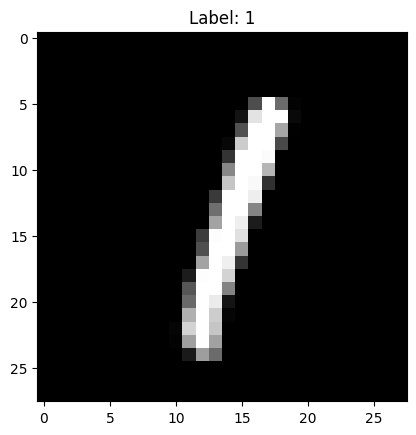

In [21]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import onnx

transform = transforms.Compose([transforms.ToTensor()])
test_loader = torch.utils.data.DataLoader(datasets.MNIST('./train/data', train=False, transform=transform,download=True),
                                        batch_size=1000, shuffle=False)
# Extract a single image from the validation set
data_iter = iter(test_loader)
images, labels = next(data_iter)
image = images[5].numpy().squeeze() # normal gets 6, 4 ,8 wrong --> quantized gets same wrong.
label = labels[5].item()

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

In [22]:
import numpy as np
from engine_compile import Model
from engine_compile import FLOAT, INT

mod = Model("train/model.onnx", INT)
mod.init_model()
with open("engineDialect/test/Engine/PythonOutput.mlir", "w+") as f:
    f.write(mod.translate(image.flatten()))

In [23]:
from engine_compile import print_data
print_data(image.flatten(),INT)


'[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 77, 254, 107, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 227, 254, 254, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 81, 254, 254, 165, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 203, 254, 254, 73, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 53, 254, 254, 250, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 134, 254, 254, 180, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [24]:
from engine import Model
mod = Model("train/model.onnx")


alt_image = image

res = mod.infer((255*alt_image).astype(np.int32))
res

[[ 5 -4  4 ... -6  8  1]
 [-2 -4  0 ...  1  1  8]
 [-7  2  5 ...  7  8  2]
 [-3  8  6 ... -2 -5  6]
 [ 5  2  8 ...  0 -3  7]]
[  3  80 131 -41 291]
[[ 270   -6   40  140 -130]
 [-107  -35   29  -22  -69]
 [-103  124 -199  -86   13]
 [ 183  -77  399 -181  264]
 [-162  141  252    2 -147]]
[ 317 -115  488  -96  206]
[[ 262  171 -100  131 -182]
 [ 102  447  -31  206  246]
 [ -83  -34  -26  104  -35]
 [ -49   -6 -129  -70  144]
 [-174  246  219  -73 -183]]
[ 29 -78 -53 -84  80]
[[-443   43  -96  203  114]
 [ 283  -82  -95  -26  -99]
 [  23 -159   75  344  -46]
 [ -36  176 -107   57  -63]
 [ 135 -186  421 -170  138]
 [-136   95   31  -99  202]
 [  23 -366 -153   58  297]
 [ -28  191   71  147 -380]
 [  98  104 -294 -245  172]
 [  35  252    3 -291  -78]]
[-207  -49 -188 -274  318  -48   60  163 -167  320]


4

In [25]:
def traverse(obj):
    if isinstance(obj, dict):
        for key, value in obj.items():
            print(f'Key: {key}')
            traverse(value)
    elif isinstance(obj, list):
        for item in obj:
            traverse(item)
    else:
        print(f'Value: {obj}')
